Assignment 0 - Task 2

# Implementing a Multi-Class Perceptron Algorithm from Scratch

In this task, we design and implement a simple neural network from scratch to classify images of handwritten digits from the simplified MNIST dataset. We will explore different weight initialization strategies, train the network using gradient descent, and evaluate its performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Loading and Preparing the Data

We begin by loading the training and test datasets and appending a column of ones to account for the bias term.

In [2]:
# Load the data
train_x = pd.read_csv('train_in.csv', header=None).values
train_y = pd.read_csv('train_out.csv', header=None).values.flatten()
test_x = pd.read_csv('test_in.csv', header=None).values
test_y = pd.read_csv('test_out.csv', header=None).values.flatten()

# Append a column of ones to the train and test data to account for bias term
T_train = np.append(train_x, np.ones((train_x.shape[0], 1)), axis=1)
T_test = np.append(test_x, np.ones((test_x.shape[0], 1)), axis=1)

## 2. Weight Initialization Strategies

We define functions to initialize weights using different strategies:

- **Random Initialization**
- **Glorot Initialization**
- **He Initialization**

In [3]:
def initialize_weights_random(input_dim, output_dim):
    return np.random.uniform(-1, 1, (input_dim, output_dim))

def initialize_weights_glorot(input_dim, output_dim):
    limit = np.sqrt(6 / (input_dim + output_dim))
    return np.random.uniform(-limit, limit, (input_dim, output_dim))

def initialize_weights_he(input_dim, output_dim):
    limit = np.sqrt(2 / input_dim)
    return np.random.uniform(-limit, limit, (input_dim, output_dim))

# Select weight initialization based on the provided method
def initialize_weights(input_dim, output_dim, init_type):
    if init_type == 'rand':
        return initialize_weights_random(input_dim, output_dim)
    elif init_type == 'glorot':
        return initialize_weights_glorot(input_dim, output_dim)
    elif init_type == 'he':
        return initialize_weights_he(input_dim, output_dim)
    else:
        raise ValueError("Unknown initialization type.")

## 3. Defining the Neural Network Functions

We define functions for:

- **Classification**: Compute the outputs and predicted class labels.
- **Performance Evaluation**: Calculate loss and accuracy.
- **Weights Update**: Update weights based on gradients and learning rate.

In [4]:
# Classify the inputs based on current weights
def classify(input_data, model_weights):
    outputs = np.dot(input_data, model_weights)
    classifications = np.argmax(outputs, axis=1)
    return outputs, classifications

# Evaluate performance of the model: calculate loss and accuracy
def evaluate_performance(model_outputs, model_classifications, correct_labels):
    num_samples = len(correct_labels)
    deviations = np.zeros(model_outputs.shape)
    total_loss = 0
    correct_classifications = np.zeros(num_samples)
    
    for i in range(num_samples):
        output = model_outputs[i]
        correct_output = np.zeros(10)
        correct_label = correct_labels[i]
        correct_output[int(correct_label)] = 1
        deviation = output - correct_output
        deviations[i] = deviation
        loss = np.sum(deviation ** 2)
        total_loss += loss
        if model_classifications[i] == correct_label:
            correct_classifications[i] = 1
    
    avg_loss = total_loss / num_samples
    accuracy = correct_classifications.mean()
    return deviations, avg_loss, accuracy

# Update weights based on gradients and learning rate
def update_weights(weight_matrix, alpha, input_data, output_deviations):
    num_samples = input_data.shape[0]
    # Compute gradient
    gradients = np.dot(input_data.T, 2 * output_deviations) / num_samples
    # Update weights
    weight_matrix -= alpha * gradients
    return weight_matrix

## 4. Training the Network

We define a function to train the network over a number of epochs, collecting performance metrics.

In [5]:
def train_network(train_input, train_labels, test_input, test_labels, W, alpha, epochs):
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []
    
    for epoch in range(epochs):
        # Forward pass on training set
        train_outputs, train_classifications = classify(train_input, W)
        train_deviations, avg_train_loss, train_accuracy = evaluate_performance(
            train_outputs, train_classifications, train_labels)
        
        # Forward pass on test set
        test_outputs, test_classifications = classify(test_input, W)
        test_deviations, avg_test_loss, test_accuracy = evaluate_performance(
            test_outputs, test_classifications, test_labels)
        
        # Store losses and accuracies
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)
        test_losses.append(avg_test_loss)
        test_accuracies.append(test_accuracy)
        
        # Update weights using gradient descent
        W = update_weights(W, alpha, train_input, train_deviations)
        
        # Print progress every 50 epochs
        if (epoch + 1) % 50 == 0 or epoch == 0:
            print(f"Epoch {epoch+1}/{epochs} - Alpha {alpha}: Train Acc = {train_accuracy:.4f}, Test Acc = {test_accuracy:.4f}")
    
    return train_losses, train_accuracies, test_losses, test_accuracies

## 5. Plotting the Results

We define a function to plot the training and test loss and accuracy over epochs for different learning rates.

In [6]:
def plot_results(epochs, results, learning_rates):
    epochs_range = range(1, epochs + 1)
    plt.figure(figsize=(14, 6))
    
    # Plot Loss
    plt.subplot(1, 2, 1)
    for alpha in learning_rates:
        train_losses, _, test_losses, _ = results[alpha]
        plt.plot(epochs_range, train_losses, label=f'Train Loss (α={alpha})')
        plt.plot(epochs_range, test_losses, label=f'Test Loss (α={alpha})', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()
    
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    for alpha in learning_rates:
        _, train_accuracies, _, test_accuracies = results[alpha]
        plt.plot(epochs_range, train_accuracies, label=f'Train Acc (α={alpha})')
        plt.plot(epochs_range, test_accuracies, label=f'Test Acc (α={alpha})', linestyle='--')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

## 6. Training and Evaluating the Network

We set up the model parameters, initialize the weights, and train the network with different learning rates.

In [13]:
# Model setup and training parameters
input_size = T_train.shape[1]
output_size = 10
epochs = 1000
learning_rates = [0.01, 0.001]

results = {}
for alpha in learning_rates:
    # Initialize weights (options: 'rand', 'glorot', 'he')
    W = initialize_weights(input_size, output_size, 'glorot')
    
    # Train the network
    train_losses, train_accuracies, test_losses, test_accuracies = train_network(
        T_train, train_y, T_test, test_y, W, alpha, epochs)
    
    # Store the results
    results[alpha] = (train_losses, train_accuracies, test_losses, test_accuracies)

Epoch 1/1000 - Alpha 0.01: Train Acc = 0.0926, Test Acc = 0.0850
Epoch 50/1000 - Alpha 0.01: Train Acc = 0.4950, Test Acc = 0.4620
Epoch 100/1000 - Alpha 0.01: Train Acc = 0.6907, Test Acc = 0.6080
Epoch 150/1000 - Alpha 0.01: Train Acc = 0.7668, Test Acc = 0.6700
Epoch 200/1000 - Alpha 0.01: Train Acc = 0.8131, Test Acc = 0.7140
Epoch 250/1000 - Alpha 0.01: Train Acc = 0.8371, Test Acc = 0.7320
Epoch 300/1000 - Alpha 0.01: Train Acc = 0.8576, Test Acc = 0.7480
Epoch 350/1000 - Alpha 0.01: Train Acc = 0.8688, Test Acc = 0.7640
Epoch 400/1000 - Alpha 0.01: Train Acc = 0.8805, Test Acc = 0.7790
Epoch 450/1000 - Alpha 0.01: Train Acc = 0.8899, Test Acc = 0.7920
Epoch 500/1000 - Alpha 0.01: Train Acc = 0.8963, Test Acc = 0.8020
Epoch 550/1000 - Alpha 0.01: Train Acc = 0.9033, Test Acc = 0.8050
Epoch 600/1000 - Alpha 0.01: Train Acc = 0.9098, Test Acc = 0.8120
Epoch 650/1000 - Alpha 0.01: Train Acc = 0.9151, Test Acc = 0.8190
Epoch 700/1000 - Alpha 0.01: Train Acc = 0.9168, Test Acc = 0.823

## 7. Plotting the Results

We plot the loss and accuracy curves for the different learning rates.

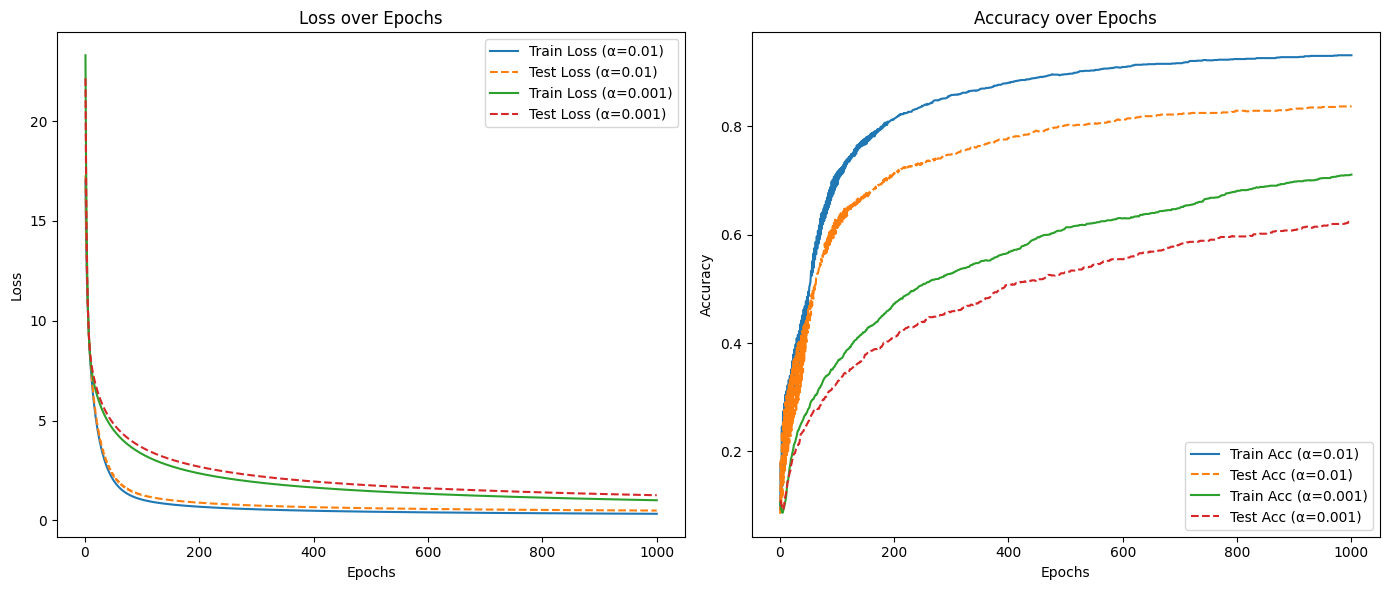

In [14]:
# Plot the comparison of results for different learning rates
plot_results(epochs, results, learning_rates)

## Discussion

The choice of weight initialization strategy and learning rate impacts the convergence speed and the final performance of the model.

In terms of classification accuracy, the single-layer multi-class perceptron performed markedly better than the simplistic nereast mean classifier, but still a bit worse than the KNN classifier.